# Medical Cost Prediction: Exploratory Data Analysis (EDA)


### 1. Setup and Data Loading

First, we'll import the necessary libraries for data manipulation and visualization.


In [138]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully and plot style is set.")

Libraries imported successfully and plot style is set.


# Basic Overview

*   **`.head()`**: View the first few rows to ensure it's loaded correctly.
*   **`.info()`**: Get a summary of the columns, data types, and check for missing values.
*   **`.describe()`**: Calculate descriptive statistics (mean, median, std dev, etc.) for the numerical columns.

In [141]:
# Cell 2: Load and Inspect Data
# Make sure 'insurance.csv' is in the same folder as your notebook
df = pd.read_csv('insurance.csv')

# --- Check the first 5 rows ---
print("--- First 5 Rows of the DataFrame ---")
print(df.head())
print("\n" + "="*70 + "\n") # Separator

# --- Get a summary of data types and non-null values ---
print("--- Data Info ---")
df.info()
print("\n" + "="*70 + "\n") # Separator



--- First 5 Rows of the DataFrame ---
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




In [143]:
df.duplicated().sum()

1

In [145]:
df[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [147]:
df.drop_duplicates(inplace=True)

In [149]:
df.duplicated().sum()

0

In [151]:
# --- Get descriptive statistics for numerical columns ---
print("--- Descriptive Statistics ---")
print(df.describe())

--- Descriptive Statistics ---
               age          bmi     children      expenses
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.665520     1.095737  13279.121638
std      14.044333     6.100664     1.205571  12110.359657
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4746.340000
50%      39.000000    30.400000     1.000000   9386.160000
75%      51.000000    34.700000     2.000000  16657.720000
max      64.000000    53.100000     5.000000  63770.430000


In [153]:
print("\n Unique Values (in each column):")
print(df.nunique())


 Unique Values (in each column):
age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


### 2. Data Visualization: Understanding Individual Features


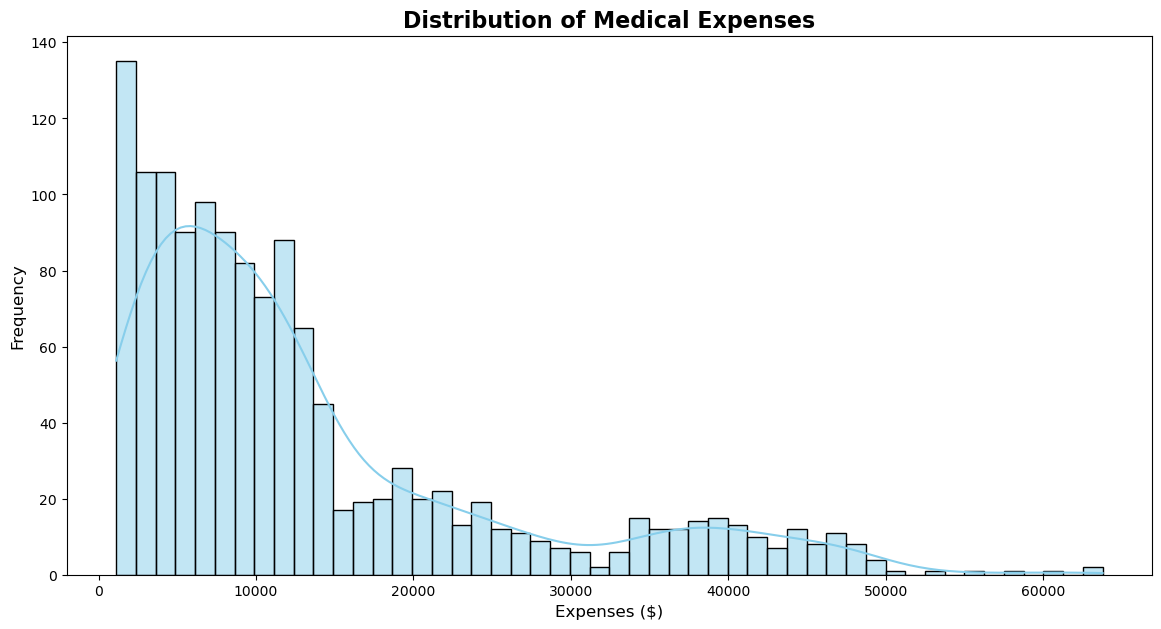

In [100]:
# Cell 3: Visualize the Distribution of Expenses

plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='expenses', kde=True, bins=50, color='skyblue')

plt.title('Distribution of Medical Expenses', fontsize=16, fontweight='bold')
plt.xlabel('Expenses ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### 📈 Expense Distribution Insight

- `expenses` is **right-skewed** — most people spend under $15,000, with a few outliers spending much more.
- This skew may affect linear models; a **log transformation** of the target can help.

---

### 📊 Categorical Feature Overview

We'll now explore `sex`, `smoker`, `region`, and `children` using count plots to understand dataset composition.


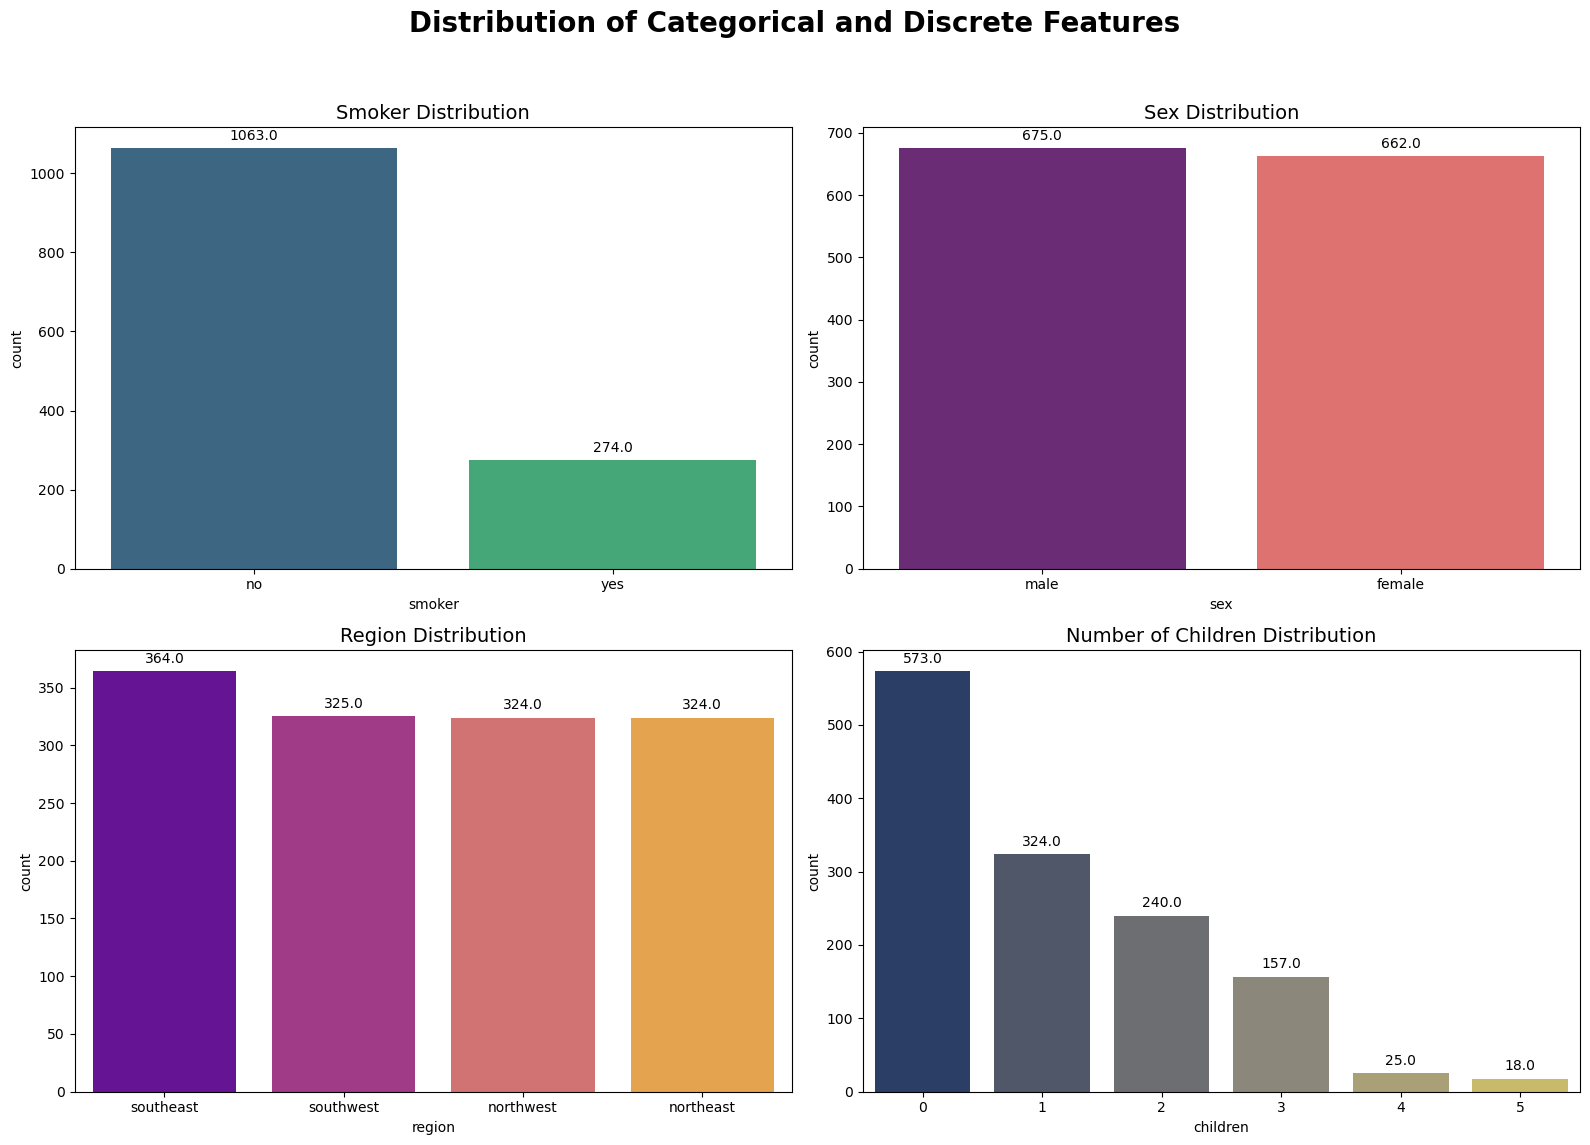

In [102]:
# Cell 4: Visualize Categorical & Discrete Features

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Categorical and Discrete Features', fontsize=20, fontweight='bold')

# Smoker
sns.countplot(ax=axes[0, 0], x='smoker', data=df, palette='viridis', order=df['smoker'].value_counts().index)
axes[0, 0].set_title('Smoker Distribution', fontsize=14)
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Sex
sns.countplot(ax=axes[0, 1], x='sex', data=df, palette='magma', order=df['sex'].value_counts().index)
axes[0, 1].set_title('Sex Distribution', fontsize=14)
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 9), textcoords='offset points')


# Region
sns.countplot(ax=axes[1, 0], x='region', data=df, palette='plasma', order=df['region'].value_counts().index)
axes[1, 0].set_title('Region Distribution', fontsize=14)
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 9), textcoords='offset points')


# Children
sns.countplot(ax=axes[1, 1], x='children', data=df, palette='cividis', order=df['children'].value_counts().index)
axes[1, 1].set_title('Number of Children Distribution', fontsize=14)
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 📊 Categorical Feature Insights

- **Smokers**: Imbalanced — far more non-smokers (1063) than smokers (274).
- **Sex**: Nearly equal — 675 males, 662 females.
- **Region**: Fairly even across all four, with the southeast slightly higher.
- **Children**: Most people (573) have no children; count drops as number of children increases.

---


#### 💨 Smoking vs Expenses

Smoking is expected to raise medical costs — a **box plot** helps visualize expense differences between smokers and non-smokers.


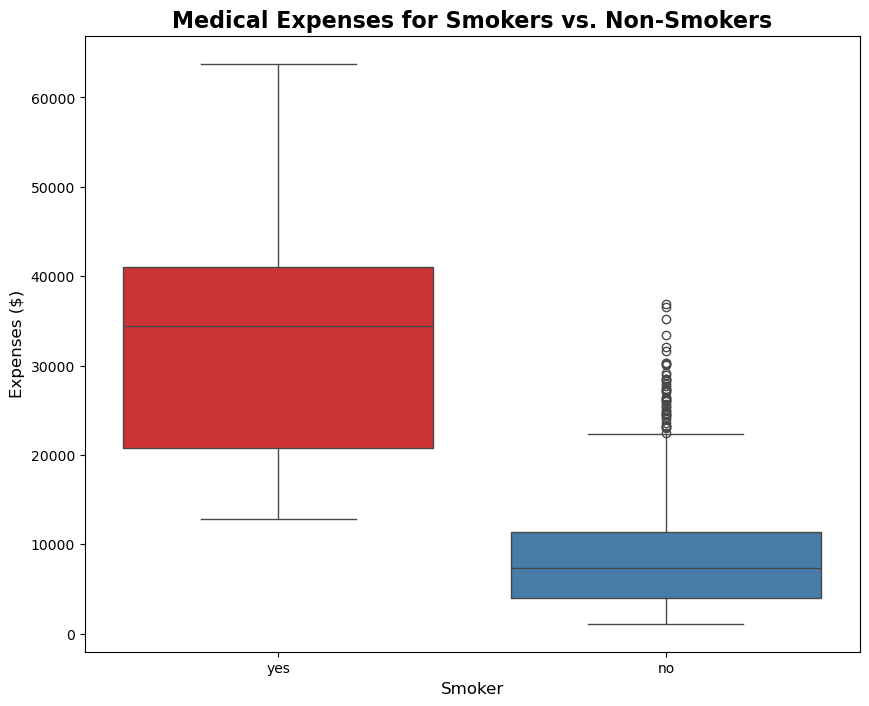

In [104]:
# Cell 5: Smoking Status vs. Expenses

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='smoker', y='expenses', palette='Set1')

plt.title('Medical Expenses for Smokers vs. Non-Smokers', fontsize=16, fontweight='bold')
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Expenses ($)', fontsize=12)
plt.show()

### 📦 Box Plot Insight: Smoking

Smoking has a **huge impact** on medical costs — smokers have a much higher median and overall expense range than non-smokers.

---

### 🧓 Age vs Expenses

Now we'll use a **scatter plot** to explore how `age` affects `expenses`, colored by `smoker` status to spot any trend differences between the two groups.


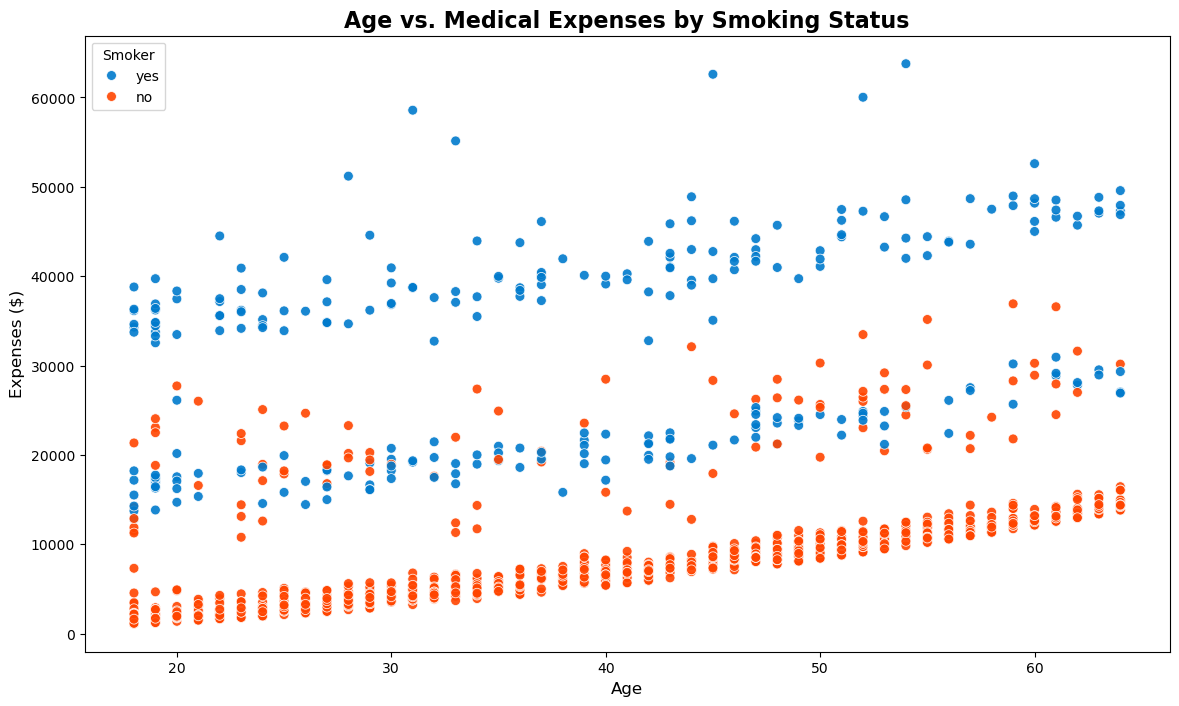

In [106]:
# Cell 6: Age vs. Expenses Scatter Plot

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='age', y='expenses', hue='smoker', palette=['#007ACC', '#FF4500'], alpha=0.9, s=50)

plt.title('Age vs. Medical Expenses by Smoking Status', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Expenses ($)', fontsize=12)
plt.legend(title='Smoker', loc='upper left')
plt.show()

### 🔍 Age Scatter Plot Insight

- **Non-smokers**: Form a dense lower cluster; expenses increase steadily with age.
- **Smokers**: Two upper clusters with **much higher** and **steeper** expense growth.
- This suggests **another factor (like BMI)** might be influencing smoker expenses.

---

### ⚖️ BMI vs Expenses

Next, we’ll plot `bmi` vs `expenses`, colored by `smoker` status, to see if higher BMI raises costs — especially for smokers.


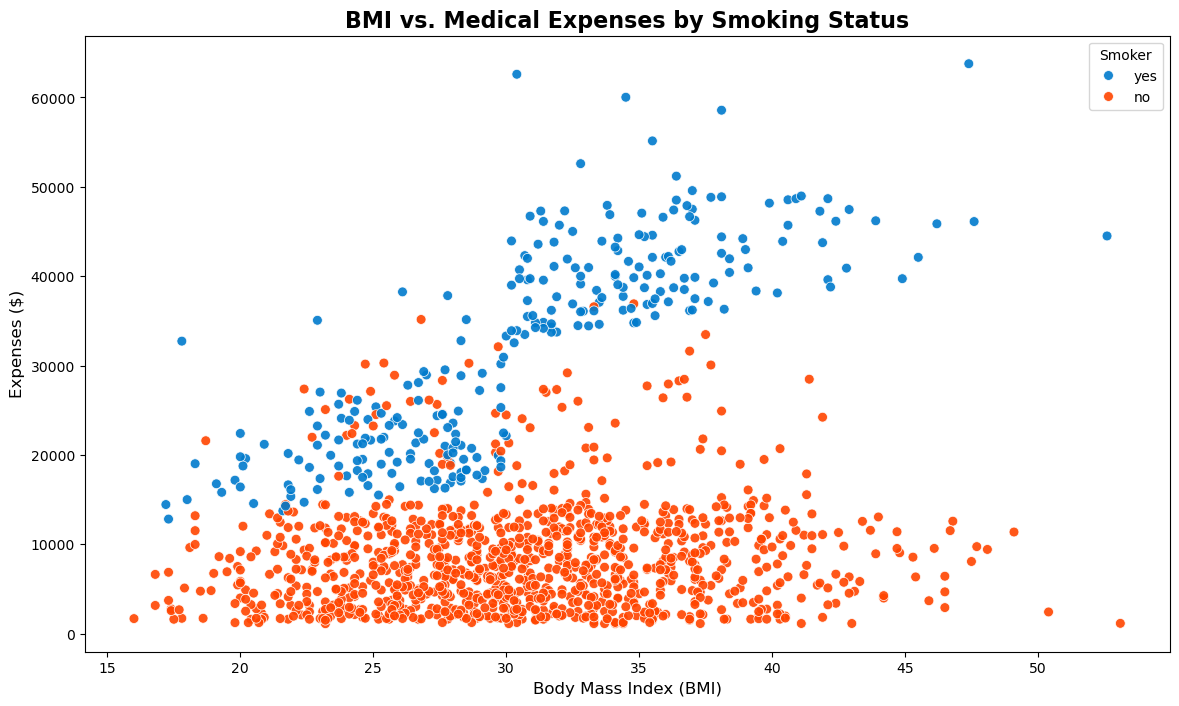

In [108]:
# Cell 7: BMI vs. Expenses Scatter Plot

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='bmi', y='expenses', hue='smoker', palette=['#007ACC', '#FF4500'], alpha=0.9, s=50)

plt.title('BMI vs. Medical Expenses by Smoking Status', fontsize=16, fontweight='bold')
plt.xlabel('Body Mass Index (BMI)', fontsize=12)
plt.ylabel('Expenses ($)', fontsize=12)
plt.legend(title='Smoker')
plt.show()

### 💥 BMI vs Expenses Insight

- **Non-smokers**: Weak link between BMI and expenses.
- **Smokers**: Clear threshold around **BMI = 30** — above this, expenses **skyrocket**.
- Confirms the two clusters: **non-obese smokers** vs **obese smokers** — key drivers of high costs.

---

### 🛠️ Feature Engineering: Making It Model-Friendly

We’ll now turn this key insight into a feature the model can learn from.

#### 📊 Creating BMI Categories

We’ll classify individuals by BMI ranges (normal, overweight, obese) and visualize the link to expenses using a **violin + strip plot** for deeper insight.


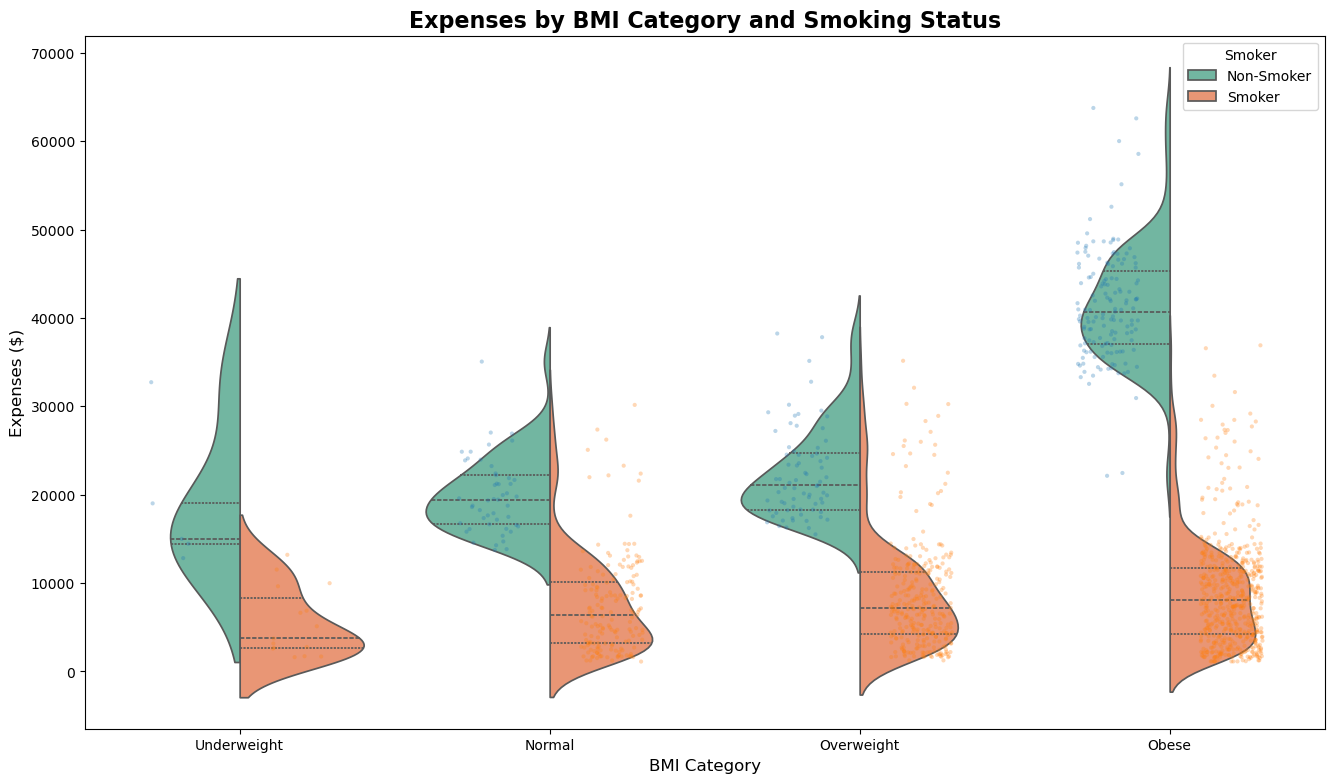

In [110]:
# Cell 8 : Create BMI Category 

# Define the bins and labels for BMI categories
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# --- Visualize the new feature with a Violin Plot and a Strip Plot ---
plt.figure(figsize=(16, 9))
sns.violinplot(data=df, x='bmi_category', y='expenses', hue='smoker',
               palette='Set2', split=True, inner='quartile')
sns.stripplot(data=df, x='bmi_category', y='expenses', hue='smoker',
              dodge=True, jitter=0.2, alpha=0.3, size=3)

plt.title('Expenses by BMI Category and Smoking Status', fontsize=16, fontweight='bold')
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Expenses ($)', fontsize=12)
# Improve the legend
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], ['Non-Smoker', 'Smoker'], title='Smoker')
plt.show()

### 🎻 Violin Plot Insight: BMI Categories vs Expenses

1. **Non-smokers (Green)**: Low, stable expenses across all BMI categories.
2. **Smokers (Orange)**: Expenses rise with BMI — especially from 'Overweight' to 'Obese'.
3. **Obese Smokers**: Huge spike — most costs cluster around **$40,000+**.
4. **Takeaway**: It's the **combo of smoking + obesity** that drives extreme expenses.

---

### 🧪 Feature Engineering: 'Obese Smoker' Flag

We'll now create a binary feature to identify this high-risk group — a key predictive variable for our model.


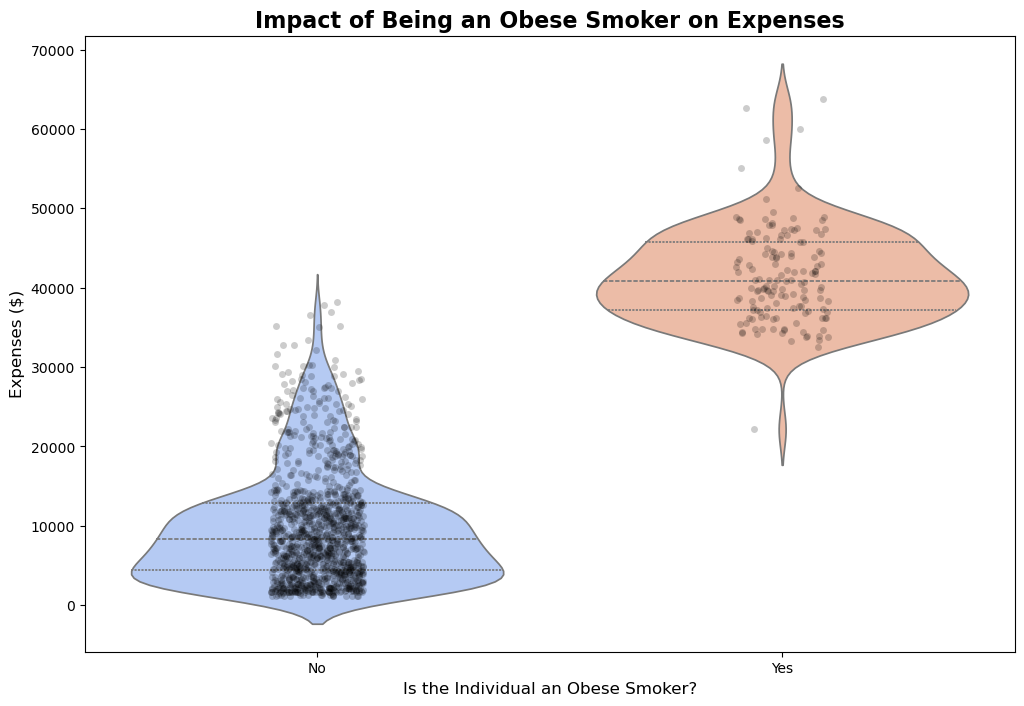

In [112]:
# Cell 9 : Create 'Obese Smoker' Feature and Visualize

# Create the 'obese_smoker' column
df['obese_smoker'] = ((df['bmi'] >= 30) & (df['smoker'] == 'yes')).astype(int)

# --- Visualize the impact of this new feature with a Violin Plot ---
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='obese_smoker', y='expenses', palette='coolwarm', inner='quartile')
sns.stripplot(data=df, x='obese_smoker', y='expenses', color='black', alpha=0.2, jitter=0.1)

plt.title('Impact of Being an Obese Smoker on Expenses', fontsize=16, fontweight='bold')
plt.xlabel('Is the Individual an Obese Smoker?', fontsize=12)
plt.ylabel('Expenses ($)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

### 🎯 Insight: 'Obese Smoker' Violin Plot

- **'No' Group (Blue)**: Most people here (non-smokers or non-obese) have costs **< $15,000** — dense and right-skewed.
- **'Yes' Group (Red)**: High-cost cluster centered around **$40,000–$45,000**, with minimal overlap.

➡️ This single feature clearly separates the high-expense group — making it a **powerful predictor** for the model.

---

### 🔗 Correlation Analysis

To wrap up EDA, we’ll explore numeric relationships using a **heatmap**.

Before that, we’ll convert categorical vars (`sex`, `smoker`) into numeric for this analysis.


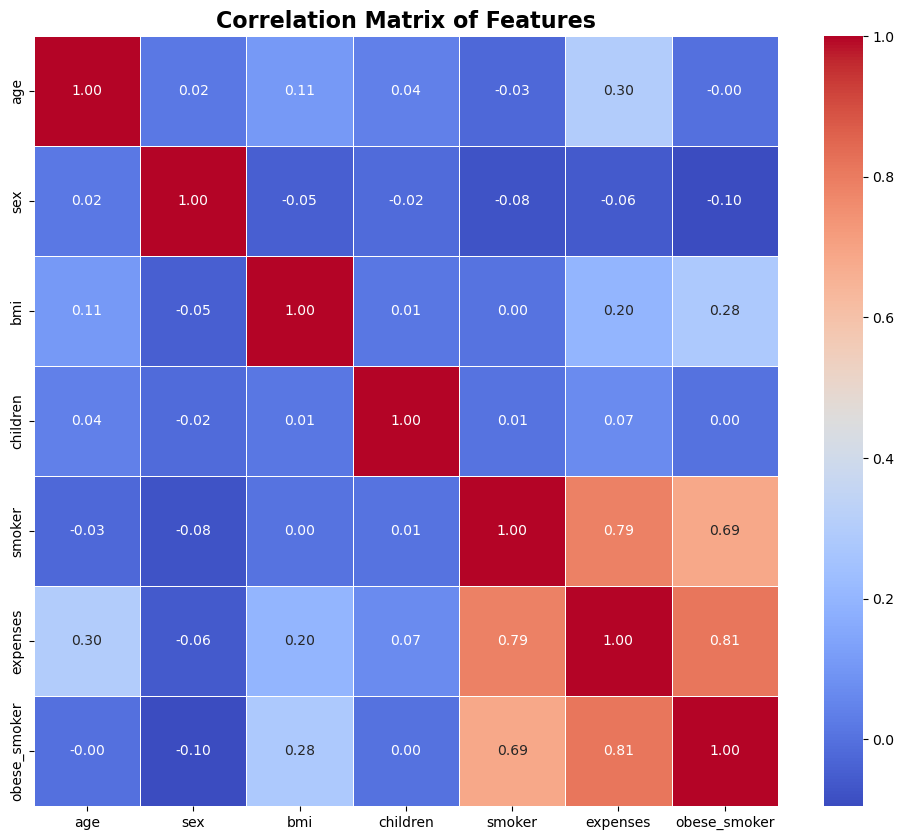

In [114]:
# Cell 10: Correlation Heatmap
# Create a copy of the dataframe to avoid changing the original categorical columns
df_corr = df.copy()

# Convert categorical columns to numbers for the correlation matrix
df_corr['sex'] = df_corr['sex'].map({'male': 0, 'female': 1})
df_corr['smoker'] = df_corr['smoker'].map({'no': 0, 'yes': 1})
# We can drop region and bmi_category for this specific correlation heatmap
df_corr = df_corr.drop(['region', 'bmi_category'], axis=1)


# Calculate the correlation matrix
corr = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='bold')
plt.show()

**Insight from the Correlation Matrix:**

The heatmap numerically confirms our visual findings:
*   `expenses` has the highest positive correlation with `smoker` (0.79), `obese_smoker` (0.69), `age` (0.30) and `bmi` (0.20).
*   Our engineered feature, `obese_smoker`, shows a very strong correlation with the target, proving its value.

In [116]:
# Save the dataframe with engineered features for the next phase
df.to_csv('insurance_processed.csv', index=False)
print("Processed DataFrame saved to 'insurance_processed.csv'")

Processed DataFrame saved to 'insurance_processed.csv'
